**HỌ VÀ TÊN: NGUYỄN THANH KIÊN.**

**MSSV: 22110092.**


## Import Ảnh

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import os
import gdown

In [2]:
gdown.download('https://drive.google.com/uc?export=download&id=1hdiBC2leSTpZXIF4nBKlDuBywCv8_IWU', 'anh1.jpg', quiet=False)
gdown.download('https://drive.google.com/uc?export=download&id=13s8FhZuEerH065e4OJwkBHANepLzabOf', 'anh2.jpg', quiet=False)
gdown.download('https://drive.google.com/uc?export=download&id=18Rsy0P-t3U8wY0owcu5pgM2b7B-O8IwV', 'anh3.jpg', quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1hdiBC2leSTpZXIF4nBKlDuBywCv8_IWU
To: /content/anh1.jpg
100%|██████████| 72.3k/72.3k [00:00<00:00, 37.3MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=13s8FhZuEerH065e4OJwkBHANepLzabOf
To: /content/anh2.jpg
100%|██████████| 208k/208k [00:00<00:00, 56.4MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=18Rsy0P-t3U8wY0owcu5pgM2b7B-O8IwV
To: /content/anh3.jpg
100%|██████████| 38.3k/38.3k [00:00<00:00, 43.5MB/s]


'anh3.jpg'

Thiết lập đường dẫn cho 3 ảnh Kevin, Rạch Giá và Angle

In [3]:
fil_path = '/content'  # Chỉ đường dẫn cơ sở thư mục cho hình ảnh.
imgKevin = 'anh3.jpg'  # Tên file của ảnh Kevin.
imgRachGia = 'anh2.jpg'  # Tên file của ảnh Rạch Giá.
imgAngle = 'anh1.jpg'  # Tên file của ảnh Angle.

# Tạo đường dẫn tệp đầy đủ cho hình ảnh bằng cách kết hợp đường dẫn cơ sở với từng tên tệp ảnh.
imgKevin_path = os.path.join(fil_path, imgKevin)  # Đường dẫn đầy đủ cho hình ảnh "Kevin".
imgRachGia_path = os.path.join(fil_path, imgRachGia)  # Đường dẫn đầy đủ cho hình ảnh "Rạch Giá".
imgAngle_path = os.path.join(fil_path, imgAngle)  # Đường dẫn đầy đủ cho hình ảnh "Angle".

# Vẽ Histogram

Biểu đồ Histogram, hay còn được gọi là Biểu đồ tần suất, là một dạng biểu đồ cột được sử dụng để trực quan hóa sự biến động của một tập hợp dữ liệu thống kê. Công cụ này giúp hiển thị một cách dễ hiểu về phân bố các thông số trong một quy trình hoặc sản phẩm.

Trong xử lý ảnh, ta vẽ biểu đồ Histogram bằng OpenCV và bằng Numpy, với một số khái niệm sau.

- BINS: trong xử lý ảnh, ta xử lý các giá trị pixel từ 0 đến 255, tổng cộng có 256 giá trị pixels. Nhưng giả sử, ta không xử lý từng giá trị một vì điều này gây tốn tài nguyên và thời gian, vì vậy, ta gộp chung các giá trị pixel theo khoảng, tức là từ pixel 1 đến pixel 10 là 1 khoảng, tương tượng cho các pixel khác. Các khoảng này ta gọi là BINS, các khoảng giá trị Pixel, hay ta gọi là các sub-parts, các phần phụ.

- DIMS: là số lượng của các đối tượng mà chúng ta thu thập trong dữ liệu. Đối với ảnh, chúng ta chỉ thu thập đối tượng duy nhất là CƯỜNG ĐỘ CÁC PIXELS. Vì vậy, dims trong trường hợp này bằng 1.

- RANGE: là phạm vi giá trị của đối tượng mà ta muốn đo. Với đối tượng là CƯỜNG ĐỘ CÁC PIXELS, Range của nó là [0, 255] hay là giá trị của cường độ.

## Vẽ Histogram cho ảnh Kevin dưới dạng ảnh xám (grayscale image) bằng OpenCV

Ta sử dụng hàm cv.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) để vẽ biểu đồ Histogram, trong đó:

- images: là hình ảnh nguồn mà chúng ta muốn xử lý, nó có thể ở kiểu dữ liệu 8 bits hoặc 32 bits (uint8 hoặc float32) và nó phải được đặt trong dấu ngoặc vuông, tức là [img].

- channels: là chỉ số kênh mà chúng ta muốn tính toán trong biểu đồ Histogram. Thông thường, kênh này chỉ số lượng màu mà chúng ta muốn tính toán, ví dụ, chúng ta muốn tính toán ba màu xanh dương, xanh lá, đỏ, thì kênh này sẽ là kênh RGB Color. Cũng giống như images, nó phải được đặt trong dấu ngoặc vuông.

- mask: Mặt nạ hình ảnh là một cách để chúng ta phân vùng cụ thể vùng ảnh mà chúng ta mong muốn xử lý, thay vì xử lý toàn bộ ảnh rồi cắt ra vùng chúng ta mong muốn. Ví dụ, bạn muốn xử lý ảnh 1/4 hình ảnh ban đầu, Mask cho phép ta phân vùng 1/4 hình ảnh đó rồi xử lý luôn, thay vì xử lý hình ảnh ban đầu và cắt 1/4 vùng chúng ta mong muốn.

- histSize: là số lượng BINS có trong Histogram. Đối với xử lý ảnh, histSize sẽ không vượt quá 256.

- ranges: trong ảnh thì range sẽ là [0, 256]


In [4]:
# Kiểm tra xem thư mục có tồn tại không trước khi đọc.
assert os.path.exists(imgKevin_path), f"File {imgKevin} does not exist"

# Đọc ảnh Kevin dưới dạng ảnh xám - grayscale.
imgKevin = cv.imread(imgKevin_path, cv.IMREAD_GRAYSCALE)
assert imgKevin is not None, f"File {imgKevin} could not be read"

# Tính toán các giá trị của biểu đồ Histogram của ảnh bằng cách dùng cv.calcHist.
hist = cv.calcHist([imgKevin], [0], None, [256], [0, 255])

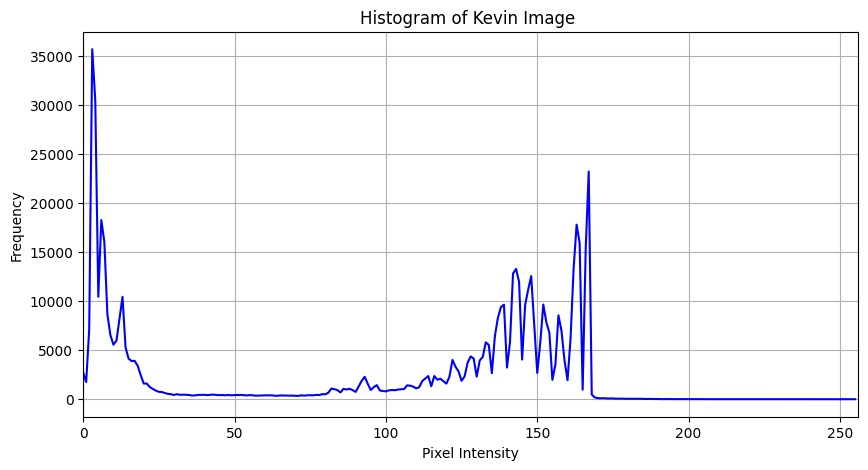

In [ ]:
# Hiển thị biểu đồ Histogram.
plt.figure(figsize=(10, 5))
plt.plot(hist, color='blue')
plt.title('Histogram of Kevin Image ')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])
plt.grid()
plt.show()

## Vẽ Histogram cho ảnh Kevin dưới dạng ảnh xám (grayscale image) bằng Numpy


Sử dụng hàm hist, bins = np.histogram(img.flatten(), 256, [0, 255]) trong Numpy để vẽ Histogram

Đối với Hists cũng giống như những tính toán trước, tuy vậy trong BINS, sẽ có 257 phần tử, vì Numpy tính toán các BINS là 0-0,99, 1-1,99, 2-2,99, v.v. Vì vậy phạm vi cuối cùng sẽ là 255-255,99. Để thể hiện điều đó, nó cũng thêm 256 vào cuối thùng. Nhưng chúng ta không cần 256 BINS, tối đa 255 là đủ.


### Sử dụng Matplotlib

Sử dụng  matplotlib.pyplot.hist() để vẽ biểu đồ Histogram

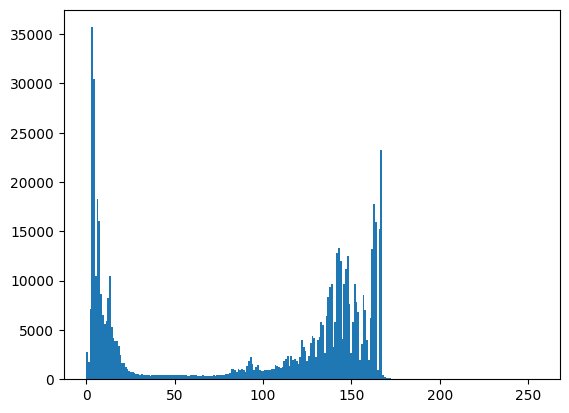

In [ ]:
# Tải hình ảnh ở thư mục imgKevin_path dưới dạng ảnh xám.
imgKevin_GRAYSCALE = cv.imread(imgKevin_path, cv.IMREAD_GRAYSCALE)

# Kiểm tra xem ảnh đã tải thành công hay không, nếu không, thả một exception hoặc một thông báo lỗi.
assert imgKevin_GRAYSCALE is not None, "File could not be read; check with os.path.exists()"

# Hiển thị biểu đồ Histogram của cường độ Pixel trong ảnh xám.
plt.hist(imgKevin_GRAYSCALE.ravel(), 256, [0, 255])
plt.show()


Sử dụng biểu đồ matplotlib bình thường để hiển thị Histogram của ảnh 3 màu BGR.

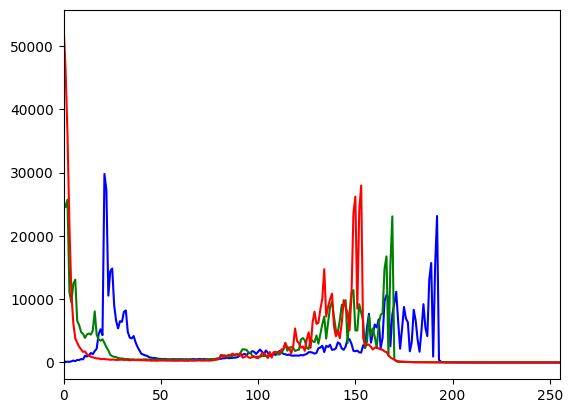

In [ ]:
# Tải hình ảnh ở thư mục imgKevin_path dưới dạng ảnh màu.
imgKevin = cv.imread(imgKevin_path)

# Kiểm tra xem ảnh đã tải thành công hay không, nếu không, thả một exception hoặc một thông báo lỗi.
assert imgKevin is not None, "File could not be read; check with os.path.exists()"

# Xác định các kênh màu để vẽ đồ thị ('b' là màu xanh dương, 'g' là màu xanh lá, và 'r' là màu đỏ).
color = ('b', 'g', 'r')

# Sử dụng vòng lặp cho từng kênh màu (xanh dương, xanh lá, đỏ) để tính toán và hiển thị nó dưới dạng biểu đồ Histogram.
for i, col in enumerate(color):
    histr = cv.calcHist([imgKevin], [i], None, [256], [0, 255])  # Tính toán các giá trị của biểu đồ Histogram cho từng kênh màu bằng cách sử dụng cv.calcHist.
    plt.plot(histr, color=col)  # Hiển thị biểu đồ Histogram cho từng kênh màu.
    plt.xlim([0, 255])  # Đặt phạm vi hoành độ cho từng cường độ Pixel.

# Hiển thị biểu đồ Histogram cho tất cả 3 kênh màu.
plt.show()

# Cân bằng Histogram

Hình ảnh chất lượng tốt cần có sự phân bố pixel đa dạng, bao gồm cả vùng tối, vùng sáng và các vùng trung gian. Ngược lại, hình ảnh chỉ tập trung pixel ở một số vùng nhất định, ví dụ như hình ảnh quá sáng với pixel chủ yếu ở vùng giá trị cao, sẽ thiếu chi tiết và độ tương phản.

Để cải thiện hình ảnh, ta cần mở rộng phân bố pixel, kéo giãn biểu đồ histogram của hình ảnh sang cả hai phía, bao gồm cả vùng tối và vùng sáng. Kỹ thuật này được gọi là cân bằng biểu đồ (histogram equalization).

Nói một cách đơn giản, cân bằng biểu đồ giúp **tăng cường độ tương phản của hình ảnh**  bằng cách phân bố lại giá trị pixel, làm cho các chi tiết trong ảnh rõ ràng hơn.

## Cân bằng Histogram bằng Numpy


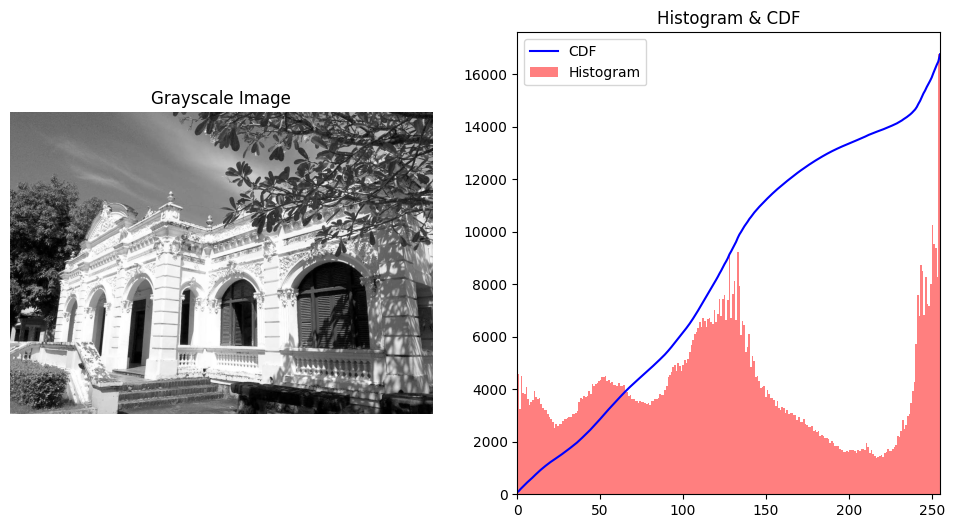

In [ ]:
# Tải hình ảnh ở thư mục imgRachGia_path dưới dạng ảnh xám.
img = cv.imread(imgRachGia_path, cv.IMREAD_GRAYSCALE)

# Kiểm tra xem ảnh đã tải thành công hay không, nếu không, thả một exception hoặc một thông báo lỗi.
assert img is not None, "File could not be read; check with os.path.exists()"

# Tính toán các giá trị của biểu đồ Histogram và hàm phân phối tích lũy (cumulative distribution function - CDF)
hist, bins = np.histogram(img.flatten(), 256, [0, 255])  # Tính toán biểu đồ với 256 BINS trong khoảng [0, 255]
cdf = hist.cumsum()  # Tính tổng tích lũy của CDF
cdf_normalized = cdf * float(hist.max()) / cdf.max()  # Normalize CDF để trực quan hóa dữ liệu.

# Thiết lập hình vẽ với kích thước xác định 12 x 6.
plt.figure(figsize=(12, 6))

# Hiển thị ảnh xám.
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')  # Hiển thị ảnh dưới dạng ảnh xám.
plt.title("Grayscale Image")  # Thiết lập Title - Tiêu đề
plt.axis('off')  # Ẩn các hoành độ và tung độ.

# Hiển thị biểu đồ Histogram và CDF.
plt.subplot(1, 2, 2)
plt.plot(cdf_normalized, color='b')  # Hiển thị CDF là đường màu xanh dương.
plt.hist(img.flatten(), 256, [0, 255], color='r', alpha=0.5)  # Hiển thị biểu đồ Histogram là các đường màu đỏ trong suốt.
plt.xlim([0, 255])  # Thiết lập hoành độ là Cường độ Pixel.
plt.legend(('CDF', 'Histogram'), loc='upper left')  # Thêm 1 Chú thích trong biểu đồ Histogram & CDF.
plt.title("Histogram & CDF")  # Thiết lập Tiêu đề - Histogram & CDF.

# Hiển thị ảnh và biểu đồ.
plt.show()

Ảnh:

- Các vùng tối (cây cối, bóng của cây) có độ sáng thấp và chiếm diện tích khá lớn.

- Các vùng sáng (tòa nhà, bầu trời) có độ sáng cao hơn, nhưng phân bố ánh sáng chưa đều.

Biểu đồ histogram có hai đỉnh lớn, tương ứng với hai mức sáng chính:

- Một đỉnh ở vùng tối (khoảng giá trị từ 0 đến 100), biểu thị các vùng tối của ảnh.

- Một đỉnh ở vùng sáng hơn (khoảng giá trị từ 150 đến 250), biểu thị các vùng sáng trong ảnh.

CDF (Cumulative Distribution Function) có dạng cong, chưa đạt được phân phối đều.

In [ ]:
# Đặt mặt nạ (Masks) cho tất cả các giá trị 0 trong CDF để tránh phát sinh lỗi khi chia cho 0.
cdf_m = np.ma.masked_equal(cdf, 0)

# Chuẩn hóa các giá trị của CDF về khoảng [0, 255].
# Thực hiện trừ các giá trị tối thiểu của CDF, tiếp tục nhân với 255, sau đó chia cho phạm vi của CDF (max - min).
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())

# Thay thế các phần tử có mặt nạ (là các giá trị 0 trong CDF lúc trước) bằng 0, và chuyển sang uint8 để tương thích với hình ảnh.
cdf = np.ma.filled(cdf_m, 0).astype('uint8')

In [ ]:
img2 = cdf[img]

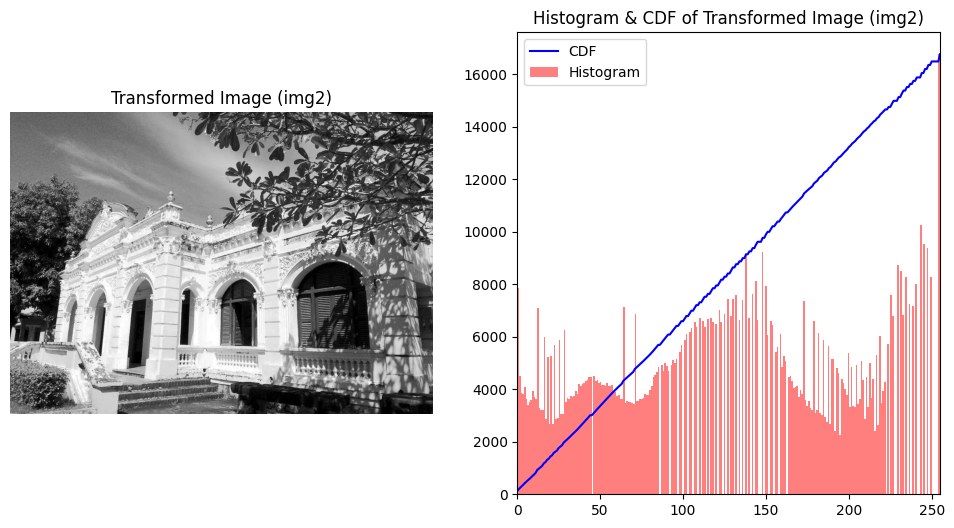

In [ ]:
# Tính toán các giá trị của biểu đồ Histogram và hàm phân phối tích lũy (cumulative distribution function - CDF) cho ảnh img2.
hist, bins = np.histogram(img2.flatten(), 256, [0, 255])  # Tính toán biểu đồ với 256 BINS trong khoảng [0, 255].
cdf = hist.cumsum()  # CTính tổng tích lũy của CDF.
cdf_normalized = cdf * float(hist.max()) / cdf.max()  # Chuẩn hóa CDF để trực quan hóa dữ liệu.

# Thiết lập hình vẽ với kích thước xác định 12 x 6.
plt.figure(figsize=(12, 6))

# Hiển thị ảnh img2 dưới dạng ảnh xám.
plt.subplot(1, 2, 1)
plt.imshow(img2, cmap='gray')  # Hiển thị ảnh dưới dạng ảnh xám.
plt.title("Transformed Image (img2)")  # Thiết lập tiêu đề.
plt.axis('off')  # Ẩn hoành độ và tung độ.

# Hiển thị biểu đồ Histogram và CDF đã được chuẩn hóa của ảnh img2.
plt.subplot(1, 2, 2)
plt.plot(cdf_normalized, color='b')  # Hiển thị CDF là đường màu xanh dương.
plt.hist(img2.flatten(), 256, [0, 255], color='r', alpha=0.5)  # Hiển thị biểu đồ Histogram là các đường màu đỏ trong suốt.
plt.xlim([0, 255])  # Thiết lập hoành độ là Cường độ Pixel.
plt.legend(('CDF', 'Histogram'), loc='upper left')  # Thêm 1 Chú thích rõ ràng trong biểu đồ Histogram & CDF.
plt.title("Histogram & CDF of Transformed Image (img2)")  # Thiết lập tiêu đề.

# Hiển thị ảnh và biểu đồ.
plt.show()

Ảnh:

- Ảnh sau khi biến đổi có độ tương phản được cải thiện rõ rệt.
- Các chi tiết trong vùng tối và sáng đều trở nên rõ ràng hơn, dễ phân biệt.
- Ảnh có độ sáng được phân bố đều hơn, không còn hiện tượng vùng tối quá tối hay vùng sáng quá sáng.


Histogram của ảnh đã biến đổi (img2):

- Biểu đồ histogram trải đều hơn từ giá trị 0 đến 255.
- Đường CDF gần như là đường thẳng, cho thấy ảnh đã được cân bằng histogram.
- Không còn xuất hiện các đỉnh lớn, thay vào đó là phân phối đều hơn, cho thấy rằng các mức sáng được phân bố đều.

In [ ]:
cv.imwrite('imgRachGia1.png',img)
cv.imwrite('imgRachGia2.png',img2)

True

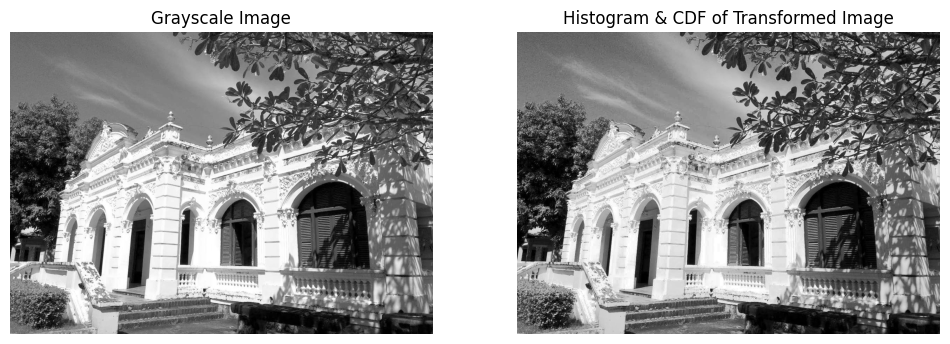

In [ ]:
# Thiết lập hình vẽ với kích thước xác định 12 x 6.
plt.figure(figsize=(12, 6))

# Hiển thị hình ảnh gốc (img) dưới dạng ảnh xám.
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')  # Hiển thị 'img' dưới dạng ảnh xám.
plt.title("Grayscale Image")  # Đặt tiêu đề cho ảnh xám gốc.
plt.axis('off')  # Ẩn hoành độ và tung độ.

# Hiển thị hình ảnh sau khi chuyển đổi (img2) dưới dạng ảnh xám.
plt.subplot(1, 2, 2)
plt.imshow(img2, cmap='gray')  # Hiển thị 'img2' dưới dạng ảnh xám.
plt.title("Histogram & CDF of Transformed Image")  # Đặt tiêu đề cho ảnh xám sau khi chuyển đổi.
plt.axis('off')  # Ẩn hoành độ và tung độ.

# Hiển thị ảnh.
plt.show()


Trước biến đổi: Ảnh có độ tương phản thấp, dễ thấy vùng tối quá tối, vùng sáng quá sáng.

Sau biến đổi: Ảnh đã được cân bằng histogram, các chi tiết trở nên rõ nét hơn, độ tương phản được cải thiện, dễ nhìn hơn.

## Cân bằng Histogram bằng OpenCV

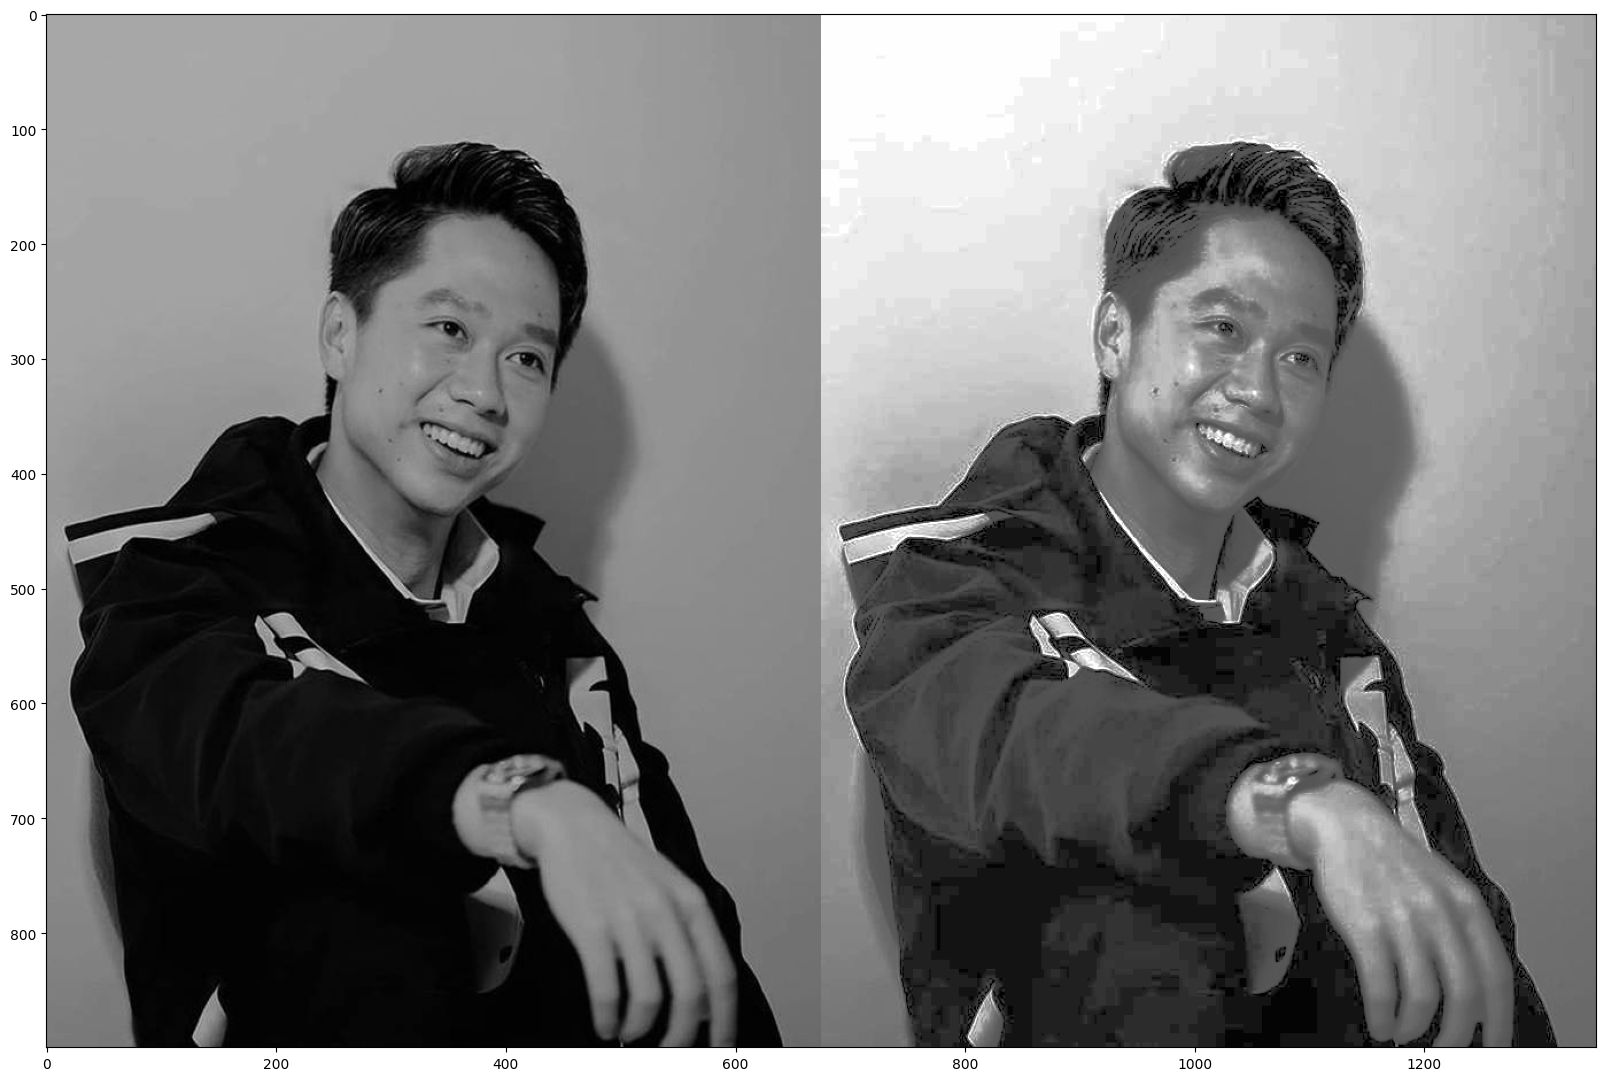

In [ ]:
# Đọc ảnh Kevin dưới dạng ảnh xám - grayscale.
img = cv.imread(imgKevin_path, cv.IMREAD_GRAYSCALE)

# Kiểm tra xem ảnh đã tải thành công hay không, nếu không, thả một exception hoặc một thông báo lỗi.
assert img is not None, "File could not be read; check with os.path.exists()"

# Cân bằng Histogram cho ảnh xám bằng cv.equalizeHist().
equ = cv.equalizeHist(img)

# Đặt 2 hình ảnh gốc và hình ảnh đã qua xử lý ở cạnh nhau để dễ so sánh, ta gọi ảnh này là ảnh xếp chông.
res = np.hstack((img, equ))  # Kết hợp ảnh gốc và ảnh đã cân bằng theo chiều ngang.

# Lưu hình ảnh xếp chồng dưới dạng'imgKevin_res.png'
cv.imwrite('imgKevin_res.png', res)

# Đặt kích thước hình cho màn hình.
plt.figure(figsize=(20, 20))  # Tạo hình có chiều rộng và chiều cao 20 inch

# Hiển thị ảnh xếp chồng đó.
plt.imshow(res, cmap="gray")  # Hiển thị ảnh 'res' dưới dạng ảnh xám.
plt.show()

Ảnh sau khi biến đổi bằng OpenCV có độ tương phản rõ rệt, đa phần là sáng hơn, tuy vậy, ảnh mất nét và khó để xem rõ

# Ứng dụng của Masks (Mặt nạ)

Ta sử dụng Mask để chọn ra vùng ảnh mà chúng ta muốn xử lý tương ứng thay vì xử lý toàn bộ ảnh rồi cắt vùng chúng ta muốn.

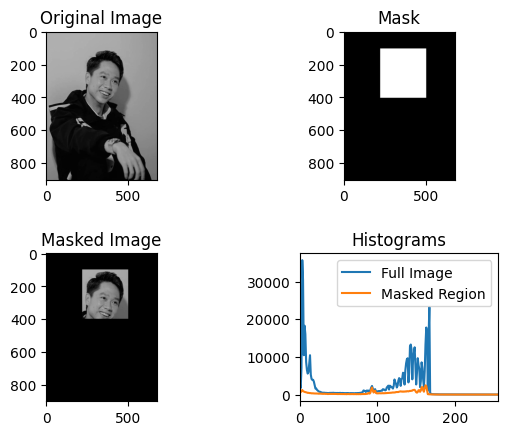

In [ ]:
# Đọc ảnh Kevin dưới dạng ảnh xám - grayscale.
img = cv.imread(imgKevin_path, cv.IMREAD_GRAYSCALE)

# Kiểm tra xem ảnh đã tải thành công hay không, nếu không, thả một exception hoặc một thông báo lỗi.
assert img is not None, "File could not be read; check with os.path.exists()"

# Tạo một Mask có cùng kích thước với ảnh xám với khởi tạo là 0 (màu đen).
mask = np.zeros(img.shape[:2], np.uint8)

# Xác định vùng trong Mask (từ hàng 100 đến hàng 400, từ cột 220 đến cột 500) và đặt thành 255 (màu trắng).
mask[100:400, 220:500] = 255

# Áp dụng Mask cho ảnh bằng cách sử dụng phép toán AND theo bit.
masked_img = cv.bitwise_and(img, img, mask=mask)

# Tính toán các giá trị của biểu đồ Histogram cho ảnh ban đầu (không Mask) và vùng ảnh chỉ có Mask.
hist_full = cv.calcHist([img], [0], None, [256], [0, 255])  # Biểu đồ Histogram của ảnh ban đầu.
hist_mask = cv.calcHist([img], [0], mask, [256], [0, 255])  # Biểu đồ Histogram của vùng ảnh chỉ có Mask.

# Thiết lập các ô con để hiển thị hình ảnh và biểu đồ Histogram.
plt.subplot(221), plt.imshow(img, 'gray')  # Ảnh gốc.
plt.title("Original Image")

plt.subplot(222), plt.imshow(mask, 'gray')  # Hiển thị Mask.
plt.title("Mask")

plt.subplot(223), plt.imshow(masked_img, 'gray')  # Hiển thị hình ảnh có Mask.
plt.title("Masked Image")

# Hiển thị biểu đ Histogram: biểu đồ hình ảnh ban đầu và biểu đồ vùng chỉ có Mask.
plt.subplot(224), plt.plot(hist_full, label='Full Image'), plt.plot(hist_mask, label='Masked Region')
plt.xlim([0, 256])  # Thiết lập hoành độ là Cường độ Pixel.
plt.legend()  # Thêm chú thích để phân biệt các biểu đồ.
plt.title("Histograms")

# Điều chỉnh khoảng cách giữa các ô con
plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Điều chỉnh hspace và wspace để tăng khoảng cách

# Hiển thị tất cả ảnh và biểu đồ.
plt.show()


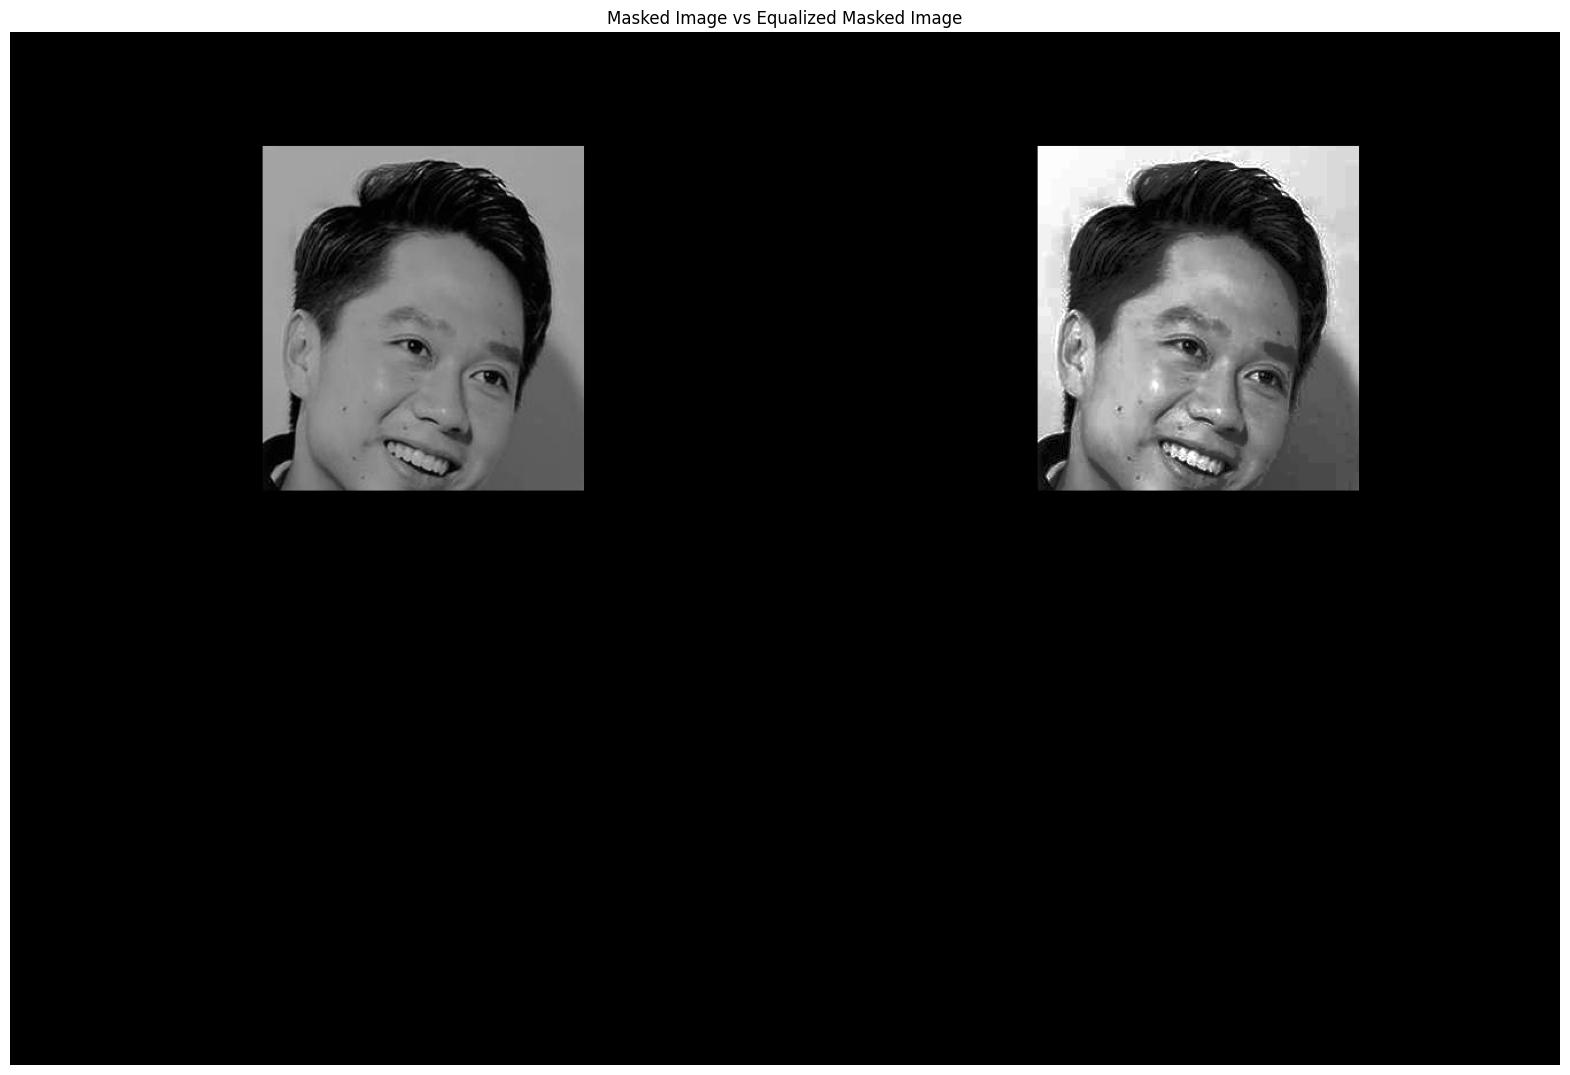

In [ ]:
# Áp dụng cân bằng Histogram cho ảnh Mask.
equ = cv.equalizeHist(masked_img)

# Đặt 2 hình ảnh gốc và hình ảnh đã qua xử lý ở cạnh nhau để dễ so sánh, ta gọi ảnh này là ảnh xếp chồng.
res = np.hstack((masked_img, equ))  # Kết hợp ảnh gốc và ảnh đã cân bằng theo chiều ngang.

# Lưu hình ảnh xếp chồng dưới dạng'imgKevin_Maskres.png'
cv.imwrite('imgKevin_Maskres.png', res)

# Đặt kích thước hình cho màn hình.
plt.figure(figsize=(20, 20))  # Tạo hình có chiều rộng và chiều cao 20 inch

# Hiển thị ảnh xếp chồng.
plt.imshow(res, cmap="gray")  # Hiển thị ảnh 'res' dưới dạng ảnh xám.
plt.title("Masked Image vs Equalized Masked Image")  # Thiết lập tiêu đề rõ ràng.
plt.axis('off')  # Ẩn hoành độ và tung độ.

# Kết xuất hình ảnh.
plt.show()

# CLAHE (Contrast Limited Adaptive Histogram Equalization) -  Tăng cường độ tương phản hình ảnh bằng CLAHE

Chúng ta đã tìm hiểu về cân bằng histogram toàn cục, phương pháp này xem xét độ tương phản của toàn bộ hình ảnh. Tuy nhiên, trong nhiều trường hợp, nó có thể mang lại kết quả không mong muốn. Hình ảnh minh họa cho thấy, mặc dù độ tương phản nền được cải thiện sau khi cân bằng histogram, nhưng chi tiết ở vùng bức tượng và bầu trời lại bị mất đi đáng kể do độ sáng tăng quá cao. Nguyên nhân là histogram của vùng bức tượng không tập trung trong một khoảng giá trị hẹp, dẫn đến việc áp dụng cân bằng histogram toàn cục không phù hợp. Việc phân tích histogram của ảnh gốc sẽ giúp hiểu rõ hơn vấn đề này.



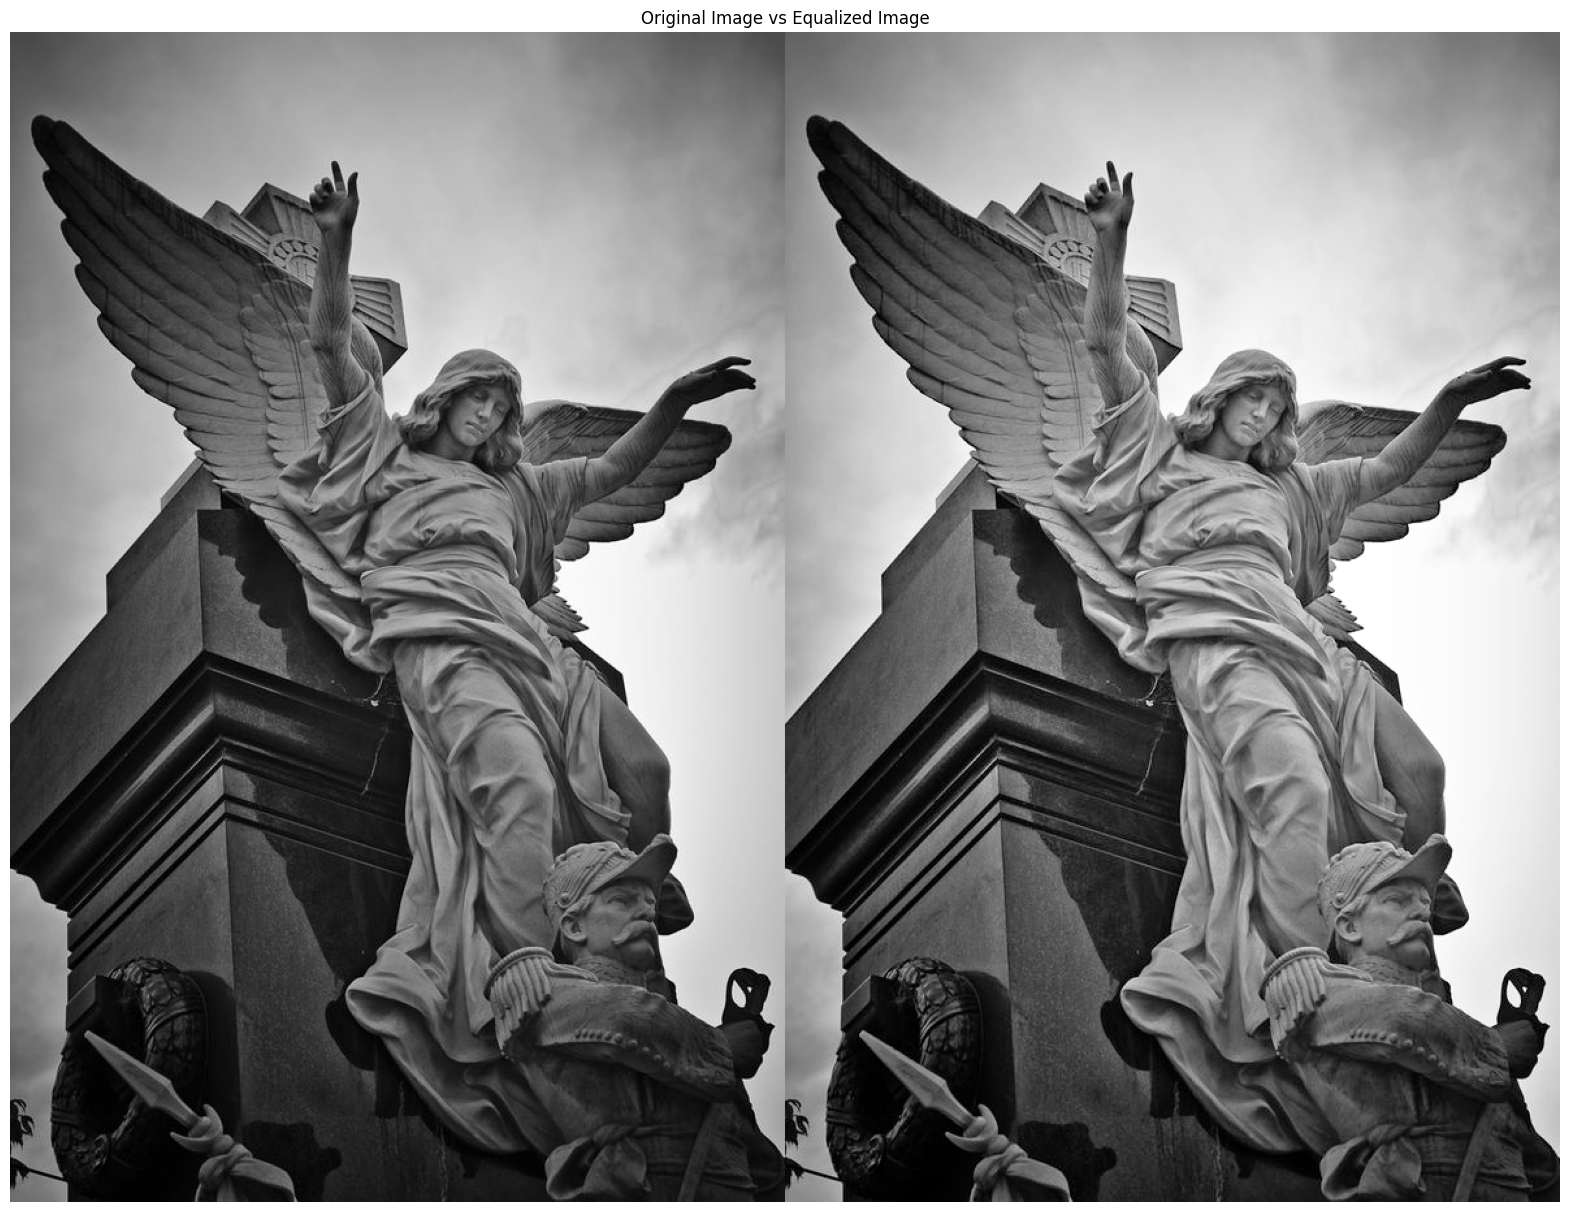

In [ ]:
# Đọc ảnh Angle dưới dạng ảnh xám - grayscale.
img = cv.imread(imgAngle_path, cv.IMREAD_GRAYSCALE)

# Kiểm tra xem ảnh đã tải thành công hay không, nếu không, thả một exception hoặc một thông báo lỗi.
assert img is not None, "File could not be read; check with os.path.exists()"

# Áp dụng cân bằng Histogram để tăng độ tương phản cho ảnh xám.
equ = cv.equalizeHist(img)

# Đặt 2 hình ảnh gốc và hình ảnh đã qua xử lý ở cạnh nhau để dễ so sánh, ta gọi ảnh này là ảnh xếp chồng.
res = np.hstack((img, equ))  # Kết hợp ảnh gốc và ảnh đã cân bằng theo chiều ngang.

# Lưu hình ảnh xếp chồng dưới dạng'imgAngle_Maskres.png'
cv.imwrite('imgAngle_res.png', res)

# Đặt kích thước hình cho màn hình.
plt.figure(figsize=(20, 20))  # Tạo hình có chiều rộng và chiều cao 20 inch

# Hiển thị ảnh xếp chồng.
plt.imshow(res, cmap="gray")  # Hiển thị ảnh 'res' dưới dạng ảnh xám.
plt.title("Original Image vs Equalized Image")  # Thiết lập tiêu đề rõ ràng.
plt.axis('off')   # Ẩn hoành độ và tung độ.

# Kết xuất hình ảnh.
plt.show()

In [ ]:
# Đọc ảnh Angle dưới dạng ảnh xám - grayscale.
img = cv.imread(imgAngle_path, cv.IMREAD_GRAYSCALE)

# Kiểm tra xem ảnh đã tải thành công hay không, nếu không, thả một exception hoặc một thông báo lỗi.
assert img is not None, "File could not be read; check with os.path.exists()"

# Tạo một đối tượng CLAHE - Tăng cường độ tương phản hình ảnh
# clipLimit: Thiết lập ngưỡng giới hạn độ tương phản.
# tileGridSize: Xác định số lượng ô trong lưới (ở đây là lưới 8 x 8)
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Áp dụng CLAHE cho ảnh xám.
cl1 = clahe.apply(img)

# Lưu kết quả ảnh đã áp dụng CLAHE dưới dạng clahe_2.jpg.
cv.imwrite('clahe_2.jpg', cl1)

True

Để giải quyết vấn đề mất chi tiết do cân bằng histogram toàn cục, phương pháp cân bằng histogram thích ứng (AHE) được sử dụng. Trong AHE, hình ảnh được chia thành các khối nhỏ gọi là "ô" (thường là 8x8 pixel). Mỗi ô được cân bằng biểu đồ riêng biệt. Điều này giúp bảo toàn chi tiết trong các vùng có histogram phân bố rộng. Để hạn chế nhiễu bị khuếch đại, AHE áp dụng giới hạn độ tương phản. Các pixel có giá trị vượt quá giới hạn sẽ được phân phối lại đồng đều. Cuối cùng, phép nội suy song tuyến được sử dụng để làm mịn các đường biên giữa các ô.


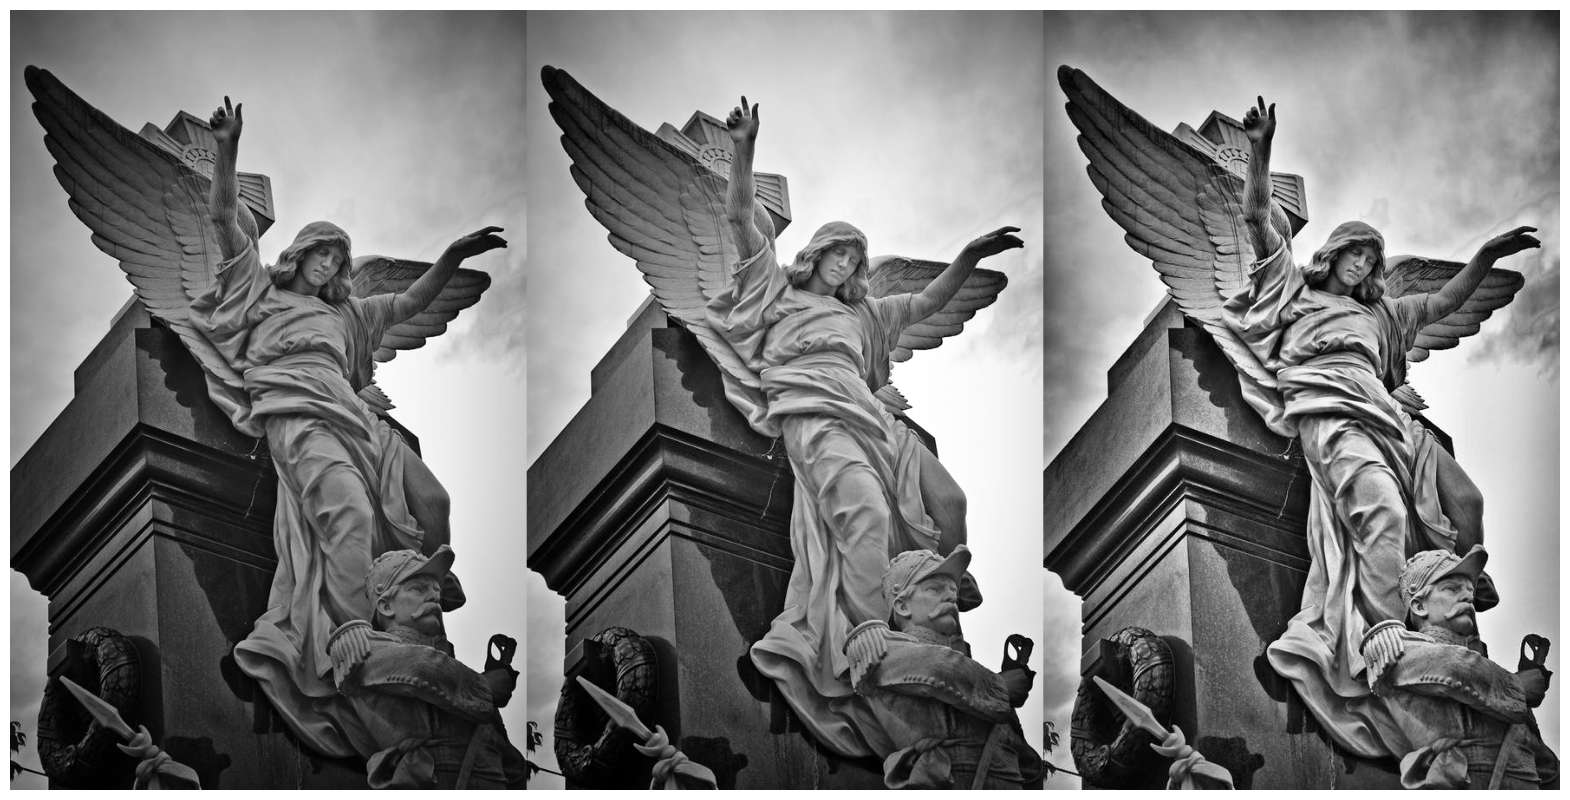

In [ ]:
# Đặt 3 hình ảnh gốc, hình ảnh đã cân bằng và hình ảnh áp dụng CLAHE ở cạnh nhau để dễ so sánh, ta gọi ảnh này là ảnh xếp chồng.
res = np.hstack((img, equ, cl1))  # Kết hợp cả 3 hình ảnh theo chiều ngang.

# Đặt kích thước hình cho màn hình.
plt.figure(figsize=(20, 20))  # Tạo hình có chiều rộng và chiều cao 20 inch

# Hiển thị ảnh xếp chồng với màu xám.
plt.imshow(res, cmap="gray")  # Hiển thị ảnh 'res' dưới dạng ảnh xám.
plt.axis('off')  # Turn off axis ticks and labels for a cleaner look

# Kết xuất hình ảnh.
plt.show()   # Hiển thị ảnh có các hình ảnh xếp chồng lên nhau

**1. Hình ảnh đầu tiên (Hình ảnh gốc):**
- Là ảnh grayscale chưa qua xử lý.
- Độ tương phản thấp, các vùng tối và vùng sáng không được phân biệt rõ ràng.
- Vùng sáng có thể bị cháy sáng (overexposed) trong khi vùng tối có thể thiếu chi tiết (underexposed).

   **Bầu trời:**
- Vùng bầu trời trong ảnh gốc có vẻ như hơi sáng và bị mất chi tiết (cháy sáng), đặc biệt là vùng gần đầu tượng thiên thần.
- Màu sắc bầu trời khá đồng đều, không có nhiều sự chuyển đổi giữa vùng sáng và tối, khiến cho ảnh trở nên "phẳng" và thiếu chiều sâu.

 **Đôi cánh của tượng thiên thần:**
- Đôi cánh không nổi bật, các chi tiết và đường nét trên cánh bị mờ, khó nhận ra rõ ràng do độ tương phản thấp.
- Vùng tối của cánh không đủ sáng, dẫn đến hiện tượng thiếu chi tiết (underexposed).

 **Khuôn mặt của thiên thần:**
- Khuôn mặt bị thiếu ánh sáng, các đường nét và chi tiết như mắt, mũi, miệng không được rõ ràng.
- Phần bóng râm trên khuôn mặt khiến ảnh trông tối và có phần "nặng nề".

**2. Hình ảnh thứ hai (Cân bằng histogram):**
- Ảnh này đã được áp dụng phương pháp cân bằng histogram.
- Độ tương phản của ảnh đã được cải thiện rõ rệt:
- Các vùng tối trở nên sáng hơn, giúp làm nổi bật các chi tiết ở vùng tối.
- Vùng sáng trở nên đồng đều hơn, tránh hiện tượng cháy sáng.
- Tuy nhiên, phương pháp cân bằng histogram có thể gây ra một số vấn đề, đặc biệt là khi ảnh có các vùng sáng tối không đồng đều, dẫn đến việc tăng độ sáng quá mức ở một số vùng.

   **Bầu trời:**
- Sau khi cân bằng histogram, bầu trời đã có nhiều chi tiết hơn, các vùng cháy sáng đã giảm bớt, nhưng có thể vẫn còn hơi sáng ở một số vùng.

- Có sự phân biệt rõ hơn giữa các lớp mây, làm cho bầu trời có chiều sâu hơn so với ảnh gốc.

 **Đôi cánh của tượng thiên thần:**
- Đôi cánh đã được làm sáng hơn, giúp thấy rõ các đường vân và cấu trúc của cánh.
- Tuy nhiên, phương pháp cân bằng histogram có thể dẫn đến hiện tượng "tăng quá mức" (over-enhancement), làm mất chi tiết ở một số vùng có độ tương phản cao.

 **Khuôn mặt của thiên thần:**
- Khuôn mặt sáng hơn, các chi tiết như mắt, mũi, miệng trở nên rõ ràng hơn.
- Tuy nhiên, một số vùng tối có thể vẫn còn hơi tối, không được chiếu sáng đồng đều, tạo cảm giác không tự nhiên.



**3. Hình ảnh thứ ba (CLAHE - Contrast Limited Adaptive Histogram Equalization)**:
- Ảnh này sử dụng kỹ thuật CLAHE, một phương pháp cân bằng histogram thích ứng.

Ưu điểm:

- CLAHE giúp cân bằng độ tương phản mà không làm mất chi tiết ở các vùng sáng và tối, đặc biệt là ở những vùng có độ tương phản cao.
- Giữ lại chi tiết tốt hơn so với cân bằng histogram thông thường.
- Ảnh có sự cải thiện rõ rệt ở các chi tiết nhỏ, các vùng sáng và tối được tách bạch rõ hơn mà không bị mất chi tiết.

   **Bầu trời:**
- Với kỹ thuật CLAHE, bầu trời có độ chi tiết tốt nhất trong cả ba hình ảnh.


- Các vùng sáng và tối của bầu trời được tách biệt rõ ràng, giúp thấy rõ sự chuyển đổi giữa các lớp mây, tạo ra chiều sâu cho hình ảnh.

- Không còn hiện tượng cháy sáng, các chi tiết mây trở nên rõ ràng và tự nhiên.

 **Đôi cánh của tượng thiên thần:**
- Đôi cánh được thể hiện rõ ràng nhất với nhiều chi tiết nhỏ và cấu trúc vân cánh hiện lên sắc nét.

- CLAHE giúp làm nổi bật cả vùng sáng và vùng tối trên cánh mà không làm mất chi tiết, mang lại cảm giác ba chiều cho đôi cánh.

 **Khuôn mặt của thiên thần:**
- Khuôn mặt được hiển thị rõ ràng với ánh sáng đồng đều hơn. Các chi tiết như mắt, mũi, và miệng được thể hiện tốt, tạo cảm giác chân thực và sống động.

- CLAHE giúp loại bỏ các bóng tối quá mức trên khuôn mặt, đồng thời làm nổi bật các chi tiết, giúp khuôn mặt có chiều sâu và mềm mại hơn.

# Bài tập và trả lời câu hỏi.


## 1. Chọn một hình ảnh bên ngoài và thực hiện tất cả các yêu cầu trên

Ở đây, em đã chọn 3 hình ảnh tương thích với các yêu cầu mà thầy đã làm mẫu trong Week2.ipynb, em cố gắng chọn các hình ảnh gần tương ứng với các hình ảnh, ví dụ, ảnh KarlMax sẽ gần giống với ảnh Kevin, và 2 ảnh còn lại cũng như vậy.

Em đã hoàn thành các yêu cầu tương đương giống như trong file hướng dẫn:
 - Vẽ Histogram bằng OpenCV và Numpy.
 - Cân bằng Histogram bằng OpenCV và Numpy.
 - Áp dụng Masks.
 - Hiểu và sử dụng CLAHE - Tăng cường độ tương phản hình ảnh.

## 2. Giải thích khái niệm "BINS" và vai trò của nó trong việc tạo biểu đồ hình ảnh.

**BINS là gì ?**

Trong xử lý ảnh kỹ thuật số, Histogram được sử dụng để mô tả sự phân bố cường độ của các giá trị pixel trong ảnh. Các giá trị pixel thường nằm trong khoảng từ 0 đến 255, tương ứng với độ sáng từ đen hoàn toàn (0) đến trắng hoàn toàn (255).

Tuy nhiên, khi làm việc với toàn bộ 256 giá trị pixel riêng lẻ, quá trình xử lý có thể trở nên rất phức tạp, tốn tài nguyên và thời gian, đặc biệt là đối với các ảnh có độ phân giải cao hoặc khi cần thực hiện nhiều phép tính.



Để tối ưu hóa quá trình xử lý, thay vì phân tích từng giá trị pixel một, chúng ta chia toàn bộ phạm vi giá trị (0-255) thành các khoảng giá trị nhỏ hơn, được gọi là BINS. Mỗi BINS sẽ bao gồm một nhóm giá trị pixel gần nhau. Ví dụ:


Thay vì xử lý từng giá trị pixel từ 0 đến 9, chúng ta có thể nhóm chúng lại thành một khoảng, gọi là BINS 1.

Tiếp theo, các giá trị từ 10 đến 19 được gộp thành BINS 2, và cứ tiếp tục như vậy cho đến khi toàn bộ khoảng từ 0 đến 255 được chia nhỏ.

Như vậy, BINS là các "khoảng giá trị pixel" hay còn gọi là các sub-parts (phần phụ) của phạm vi giá trị cường độ sáng trong ảnh.

**Tại sao cần sử dụng BINS?**

Việc sử dụng BINS mang lại nhiều lợi ích, bao gồm:

Tiết kiệm tài nguyên và thời gian: Thay vì phải tính toán và phân tích cho từng giá trị pixel riêng lẻ, việc nhóm các giá trị lại giúp giảm số lượng phần tử cần xử lý, từ đó tăng hiệu quả xử lý.

Giảm nhiễu: Khi các giá trị pixel được gộp chung lại thành một BINS, các giá trị nhiễu lẻ tẻ có thể được "làm mờ" và ít ảnh hưởng đến phân tích tổng thể hơn.

Hiển thị histogram dễ hiểu hơn: Với số lượng BINS nhỏ hơn, histogram sẽ dễ quan sát và phân tích hơn. Thay vì có quá nhiều thanh (bars) hiển thị cho từng giá trị pixel từ 0 đến 255, chỉ có một số ít các thanh đại diện cho các BINS, giúp người dùng dễ nhận biết sự phân bố cường độ sáng.

## 3. Tại sao chúng ta cần chia biểu đồ thành "BINS"?


**1. Tối ưu hóa tài nguyên và thời gian xử lý**

- Khi làm việc với ảnh số, các giá trị pixel thường nằm trong khoảng từ 0 đến 255, tức là có tổng cộng 256 mức cường độ khác nhau.

- Nếu chúng ta xử lý từng giá trị pixel riêng lẻ, số lượng phép tính cần thực hiện sẽ rất lớn, đặc biệt với các ảnh có độ phân giải cao (hàng triệu điểm ảnh). Điều này làm tiêu tốn nhiều tài nguyên và thời gian xử lý.

- Chia biểu đồ thành BINS giúp nhóm các giá trị pixel lại, giảm số lượng phần tử cần xử lý, từ đó tăng tốc độ tính toán.

**2. Giảm độ phức tạp và dễ phân tích hơn**
- Khi hiển thị một histogram với 256 mức giá trị, biểu đồ có thể rất phức tạp và khó đọc, nhất là với những bức ảnh có phân bố cường độ sáng đa dạng.

- Chia thành BINS giúp biểu đồ trở nên gọn gàng và dễ quan sát hơn, bởi vì thay vì có 256 cột (bars), chúng ta chỉ cần hiển thị một số ít cột, mỗi cột đại diện cho một nhóm giá trị pixel.

**3. Giảm nhiễu và làm mịn dữ liệu**

- Dữ liệu ảnh thường có chứa nhiễu (noise), tức là các giá trị pixel lẻ tẻ và không liên quan. Nếu hiển thị từng giá trị riêng lẻ, histogram có thể trở nên không ổn định và khó phân tích.

- Việc gộp các giá trị thành BINS giúp làm mịn biểu đồ, làm giảm ảnh hưởng của các giá trị nhiễu và thể hiện một cái nhìn tổng quát, ổn định hơn về sự phân bố cường độ sáng.

**4. Hỗ trợ các thuật toán xử lý ảnh**

- Nhiều thuật toán xử lý ảnh, như Equalization (cân bằng histogram) hay CLAHE (Contrast Limited Adaptive Histogram Equalization), sử dụng BINS để điều chỉnh và tối ưu hóa cường độ sáng của ảnh.

- Việc chia thành BINS giúp dễ dàng xử lý và điều chỉnh phân bố cường độ, cải thiện chất lượng và độ tương phản của ảnh.


VÍ DỤ:
Giả sử chúng ta có một ảnh và muốn phân tích sự phân bố cường độ sáng. Nếu chia biểu đồ thành 16 BINS, mỗi BINS sẽ đại diện cho một khoảng giá trị pixel rộng hơn (ví dụ từ 0-15, 16-31, v.v.). Điều này cho phép chúng ta nhận ra các đặc điểm chính của ảnh mà không cần xử lý toàn bộ 256 giá trị riêng lẻ, giúp tiết kiệm thời gian và đơn giản hóa quá trình phân tích.



## 4. Trong hàm `cv.calcHist()`, các tham số `image`, `channel`, `mask`, `histSize` và `range` có ý nghĩa gì?

- images: là hình ảnh nguồn mà chúng ta muốn xử lý, nó có thể ở kiểu dữ liệu 8 bits hoặc 32 bits (uint8 hoặc float32) và nó phải được đặt trong dấu ngoặc vuông, tức là [img].

- channels: là chỉ số kênh mà chúng ta muốn tính toán trong biểu đồ Histogram. Thông thường, kênh này chỉ số lượng màu mà chúng ta muốn tính toán, ví dụ, chúng ta muốn tính toán ba màu xanh dương, xanh lá, đỏ, thì kênh này sẽ là kênh RGB Color. Cũng giống như images, nó phải được đặt trong dấu ngoặc vuông. Đối với ảnh xám, chỉ số kênh là 0 vì chỉ có một kênh duy nhất.

- mask: mask là một ảnh nhị phân có cùng kích thước với ảnh nguồn, được sử dụng để phân vùng cụ thể của ảnh mà chúng ta muốn tính toán Histogram. Mặt nạ hình ảnh là một cách để chúng ta phân vùng cụ thể vùng ảnh mà chúng ta mong muốn xử lý, thay vì xử lý toàn bộ ảnh rồi cắt ra vùng chúng ta mong muốn. Ví dụ, bạn muốn xử lý ảnh 1/4 hình ảnh ban đầu, Mask cho phép ta phân vùng 1/4 hình ảnh đó rồi xử lý luôn, thay vì xử lý hình ảnh ban đầu và cắt 1/4 vùng chúng ta mong muốn. Mặt nạ rất hữu ích khi chỉ muốn tính Histogram cho một phần nhỏ của ảnh, thay vì tính cho toàn bộ ảnh. Điều này giúp tiết kiệm thời gian và tập trung vào khu vực quan tâm (Region of Interest - ROI).

- histSize: là số lượng BINS có trong Histogram. Đối với xử lý ảnh, histSize sẽ không vượt quá 256. Trong một số trường hợp, để giảm thiểu tài nguyên và thời gian xử lý, chúng ta có thể giảm histSize (ví dụ: 16, 32, 64), điều này sẽ làm gộp nhiều giá trị pixel lại thành các nhóm lớn hơn

- ranges:  chỉ định phạm vi giá trị pixel mà chúng ta muốn tính toán Histogram. Đối với ảnh 8-bit, phạm vi thông thường là [0, 256], nghĩa là từ giá trị pixel 0 đến 255.

## 5. Dựa vào histogram của hình ảnh, ta có thể nói gì về hình ảnh đó?


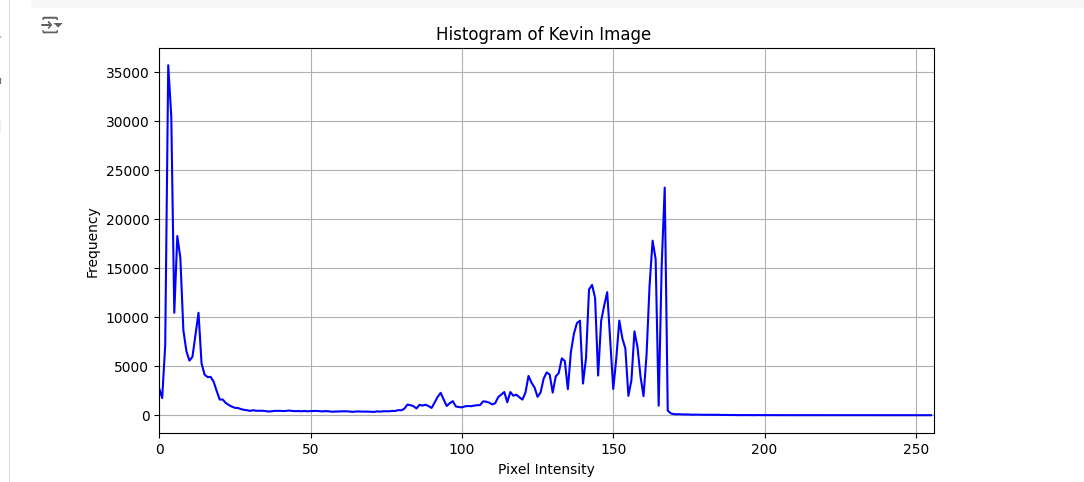



Ảnh trên là ảnh Histogram của ảnh Kevin. Từ biểu đồ Histogram, ta rút ra được một số nhận xét như sau:

- Biểu đồ Histogram thể hiện phạm vi cường độ pixel rộng, điều này cho thấy hình ảnh có dải động (dynamic range) tốt, bao gồm cả vùng tối và vùng sáng.

- Có hai đỉnh nổi bật trong biểu đồ. Đỉnh lớn hơn ở khoảng cường độ pixel 200 có khả năng tương ứng với khu vực nền sáng. Đỉnh nhỏ hơn nằm ở khoảng cường độ pixel 30-40 có thể đại diện cho các yếu tố tối hơn, như quần áo của Kevin.

- Hình dạng của Histogram khá không đều, với nhiều đỉnh và đáy nhỏ hơn. Điều này cho thấy hình ảnh có sự phức tạp về tông màu và độ tương phản rõ rệt.

- Histogram không có điểm nào có tần suất cực cao hoặc cực thấp, điều này cho thấy hình ảnh có phơi sáng tốt, không bị cắt mất vùng sáng hoặc vùng tối.

Nhìn chung, biểu đồ Histogram cho thấy hình ảnh Kevin có dải tông màu cân bằng, độ tương phản tốt và sự pha trộn giữa các vùng sáng và tối, tạo nên một bức ảnh hấp dẫn và thú vị về mặt thị giác.








array([[167, 167, 167, ..., 141, 141, 141],
       [167, 167, 167, ..., 141, 141, 141],
       [167, 167, 167, ..., 141, 141, 141],
       ...,
       [121, 121, 121, ..., 104, 104, 104],
       [121, 121, 121, ..., 104, 104, 104],
       [121, 121, 121, ..., 104, 104, 104]], dtype=uint8)
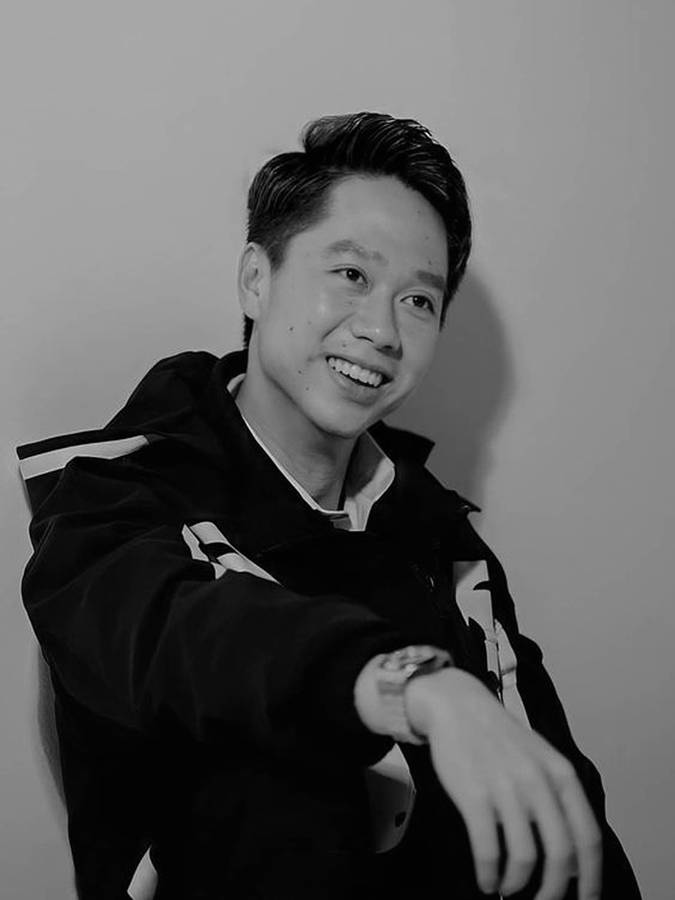

In [5]:
imgKevin

## 6. Vẽ biểu đồ của ảnh sau khi cân bằng Histogram và so sánh với ảnh chưa cân bằng; bạn có nhận xét gì?

Biểu đồ Histogram trước khi cân bằng của ảnh RachGia
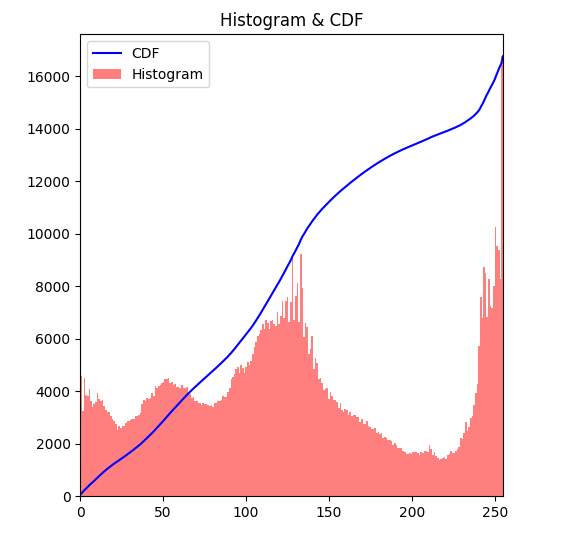


Biểu đồ Histogram sau khi cân bằng của ảnh RachGia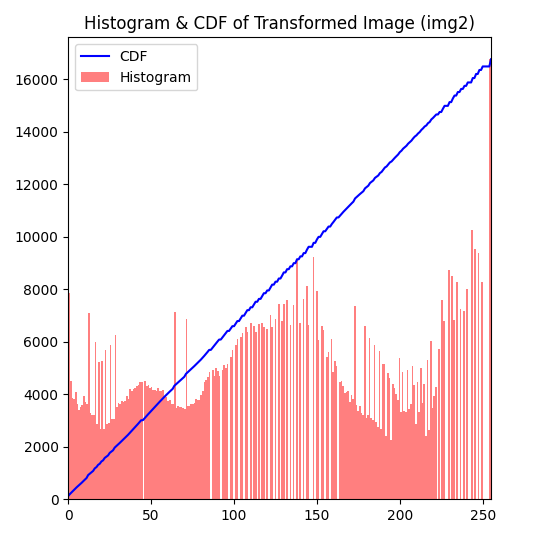

**Nhận xét:**



Hai biểu đồ Histogram trên  thể hiện sự khác biệt trong phân bố cường độ pixel trước và sau khi áp dụng một phép biến đổi cân bằng lên hình ảnh:

- Biểu đồ đầu tiên là của hình ảnh gốc. Nó có phân bố hai đỉnh (bimodal), với một đỉnh lớn ở vùng cường độ pixel cao và một đỉnh nhỏ hơn ở vùng cường độ pixel thấp. Điều này cho thấy hình ảnh gốc có sự cân bằng tốt giữa các khu vực sáng và tối.


- Biểu đồ thứ hai là của hình ảnh sau khi được biến đổi. Phân bố này nghiêng nhiều hơn về phía các cường độ pixel cao, với một đỉnh lớn nằm ở bên phải của biểu đồ. Điều này chứng tỏ rằng phép biến đổi đã tăng độ sáng và độ tương phản tổng thể của hình ảnh, khiến hình ảnh trông sáng hơn và có xu hướng theo kiểu "high-key" (sáng, nhiều vùng sáng).


- Việc tăng chiều cao và thu hẹp đỉnh bên phải cũng cho thấy phép biến đổi đã mở rộng dải động của hình ảnh, làm tăng độ tách biệt giữa các pixel sáng và tối. Điều này khiến cho hình ảnh sau khi biến đổi trở nên ấn tượng và nổi bật hơn so với hình ảnh ban đầu.

- Nhìn chung, 2 biểu đồ Histogram cho thấy phép biến đổi đã thay đổi cân bằng tông màu và độ tương phản của hình ảnh, làm cho nó có xu hướng theo kiểu "high-key" với độ tương phản cao hơn. Loại điều chỉnh này thường được sử dụng để làm cho hình ảnh trở nên ấn tượng hơn về mặt thị giác hoặc để thu hút sự chú ý vào các khu vực nhất định trong bức ảnh.







## 7. Sử dụng trực giác của em khi so sánh ảnh sau khi cân bằng với ảnh gốc, hãy đưa ra nhận xét của mình.

Sử dụng Numpy để cân bằng Histogram, ta được kết quả sau cho ảnh RachGia.

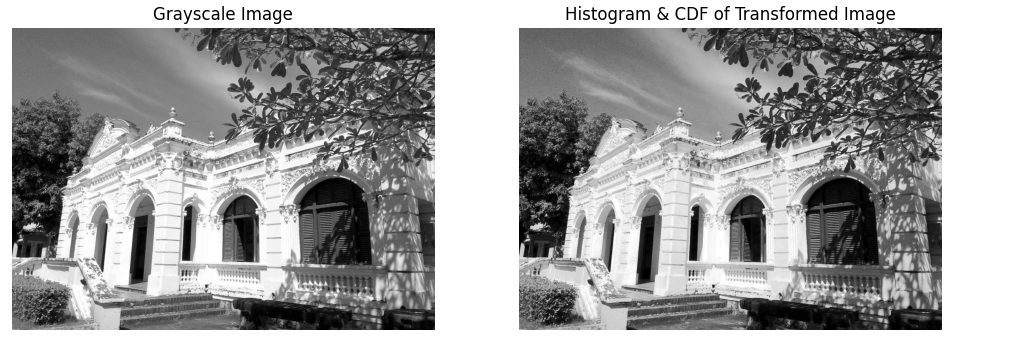




Sử dụng OpenCV để cân bằng Histogram, ta được kết quả sau cho ảnh Kevin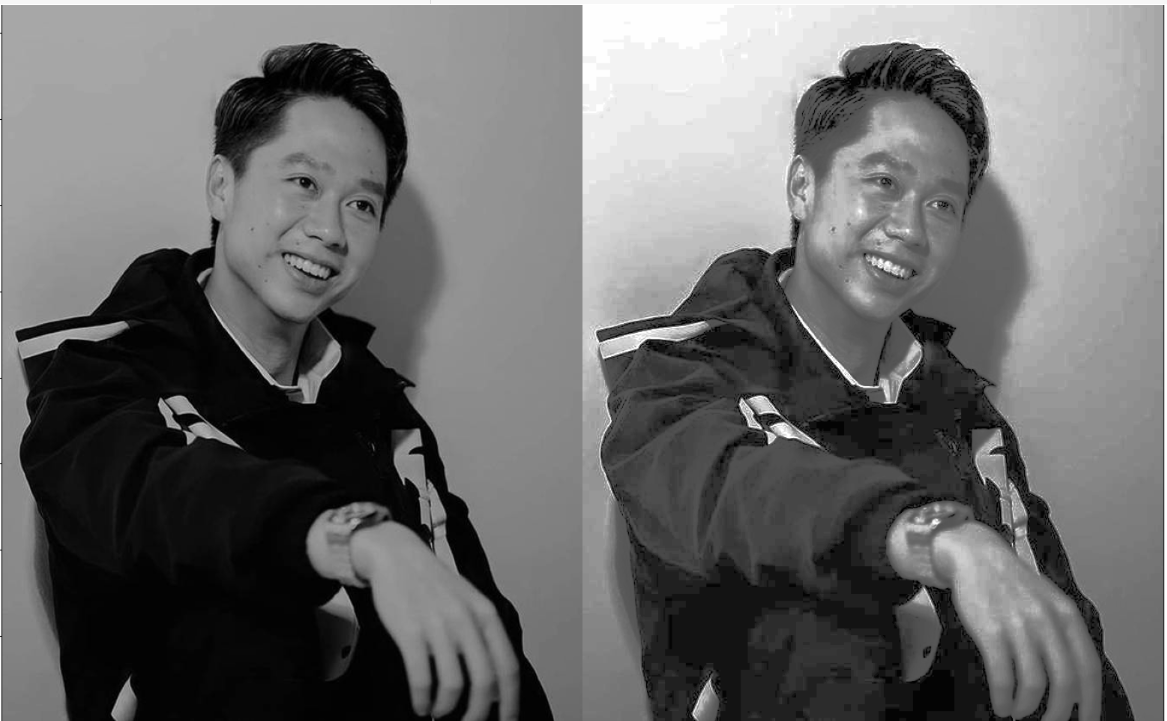.

So sánh hai ảnh với 2 kĩ thuật Numpy và OpenCV, ta luôn thấy được rằng:

- Hình ảnh gốc (trái):
Hình ảnh có xu hướng tối hơn, với độ tương phản thấp và dải động hạn chế.
Các chi tiết trong vùng bóng đổ (shadows) và vùng sáng (highlights) không rõ ràng, ít nổi bật hơn.

- Hình ảnh sau biến đổi (phải):
Hình ảnh sáng hơn và có độ tương phản cao hơn tổng thể.
Các chi tiết trong vùng bóng đổ và vùng sáng rõ ràng hơn, và dải động đã được mở rộng.
Cân bằng tông màu của hình ảnh đã thay đổi, với các vùng sáng trở nên chiếm ưu thế hơn.

**Chi tiết hơn:**

1. Khuôn mặt của Kevin:
- Các chi tiết trên khuôn mặt của Kevin đã trở nên rõ ràng và sắc nét hơn sau khi biến đổi, với sự tương phản mạnh mẽ hơn giữa vùng sáng và tối.

- Những đặc điểm trên khuôn mặt như đôi mắt, mũi và nụ cười trở nên nổi bật và dễ nhận thấy hơn.

- Độ sáng tổng thể của khuôn mặt đã tăng lên, làm cho biểu cảm khuôn mặt thu hút sự chú ý hơn.

- Tuy vậy ảnh rất mờ và không tự nhiên, bị nhiễu nhiều và gây khó chịu cho người nhìn.

2. . Ánh sáng và bóng đổ:
- Những đường bóng của lá cây chiếu trên bức tường phía sau trong ảnh RachGia rõ nét hơn, tạo nên hiệu ứng bóng đổ sinh động.

- Ánh sáng trong toàn cảnh trở nên cân bằng hơn, với ít vùng có độ sáng quá cao hoặc quá tối.
3. Các yếu tố nền:
- Các chi tiết kiến trúc của tòa nhà phía sau như cánh cửa hình vòm và các chi tiết trang trí đã hiện lên rõ ràng hơn.
- Kết cấu và hoa văn của lá cây và tán lá cũng được thể hiện sắc nét hơn, tạo ra sự phong phú về mặt thị giác.
- Độ rõ nét và sắc bén của nền đã được cải thiện, giúp người xem dễ dàng nhận biết các chi tiết.

**So sánh hiệu quả của cân bằng Histogram bằng OpenCV và NumPy:**


Cả hai phương pháp đều cho kết quả tương tự về việc mở rộng dải động và tăng độ tương phản, nhưng vẫn có một số khác biệt nhỏ:


OpenCV (áp dụng cho hình ảnh Kevin):

- Phép biến đổi mạnh mẽ hơn, tạo ra hình ảnh có độ tương phản cao và theo xu hướng "high-key" (sáng rõ).

NumPy (áp dụng cho hình ảnh Rạch Giá):

- Phép biến đổi ôn hòa hơn, tạo ra dải tông màu cân bằng hơn.


Nhìn chung, sử dụng Numpy để cân bằng Histogram sẽ cho ra ảnh có chất lượng tốt hơn so với OpenCV